In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
class MarginalRates:
  def __init__(self, rates):
    sorted_kvs = sorted(rates.items(), key=lambda p: p[0])
    self._brackets = []
    for (bracket_bottom,rate), (bracket_top, _) in zip(sorted_kvs, sorted_kvs[1:]):
      self._brackets.append((bracket_top - 1 - bracket_bottom, rate))
    self._top_rate = sorted_kvs[-1][1]

  def apply(self, value: int) -> int:
    acc = 0
    for bracket_width, rate in self._brackets:
      value_in_bracket = min(value, bracket_width)
      # Not sure if this way of rounding is correct. Close enough.
      tax_in_bracket = int(rate * value_in_bracket)
      acc += tax_in_bracket
      value -= value_in_bracket
    return acc + int(self._top_rate * value)

In [ ]:
# Based on https://www.gov.uk/national-insurance-rates-letters
# Category A, FY2021
ni_weekly_marginal_rates = MarginalRates({
    0: 0,
    18401: 0.12,
    96701: 0.02, 
})

In [ ]:
# It should actually be 9462 lol
# Close enough
assert ni_weekly_marginal_rates.apply(100000) == 9461

In [118]:
df = pd.DataFrame({'weekly_income': np.arange(5000000, step=10-00)})
df['annual_income'] = df['weekly_income'] * 52  # ish
df['weekly_ni'] = df['weekly_income'].apply(ni_weekly_marginal_rates.apply)
df['annual_ni'] = df['weekly_ni'] * 52
df['effective_rate'] = df['weekly_ni'] / df['weekly_income']
main_df = df

In [119]:
matplotlib.rc('font', size=18)

def do_plot(df, col, ylabel):
  df = pd.DataFrame(df)
  df['annual_income'] /= 100  # Convert to pounds
  df['annual_ni'] /= 100  # Convert to pounds
  df['effective_rate'] *= 100 # Convert to percent

  f, ax = plt.subplots(figsize=(12, 8))
  ax.set(xlabel='Annual Income £', ylabel=ylabel)

  def func(x, pos):
      return '{:0,d}'.format(int(x))
  ax.xaxis.set_major_formatter(tkr.FuncFormatter(func))
  ax.yaxis.set_major_formatter(tkr.FuncFormatter(func))

  sns.lineplot(ax=ax, data=df, x='annual_income', y=col)

In [120]:
df.tail()

,weekly_income,annual_income,weekly_ni,annual_ni,effective_rate
499995,4999950,259997400,107460,5587920,0.021492
499996,4999960,259997920,107460,5587920,0.021492
499997,4999970,259998440,107460,5587920,0.021492
499998,4999980,259998960,107460,5587920,0.021492
499999,4999990,259999480,107460,5587920,0.021492


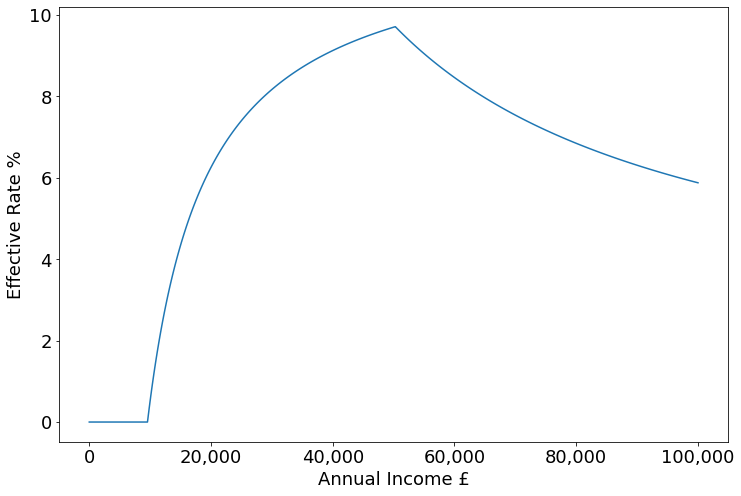

In [121]:
do_plot(main_df[main_df['annual_income'] < 10000000], 'effective_rate', 'Effective Rate %')

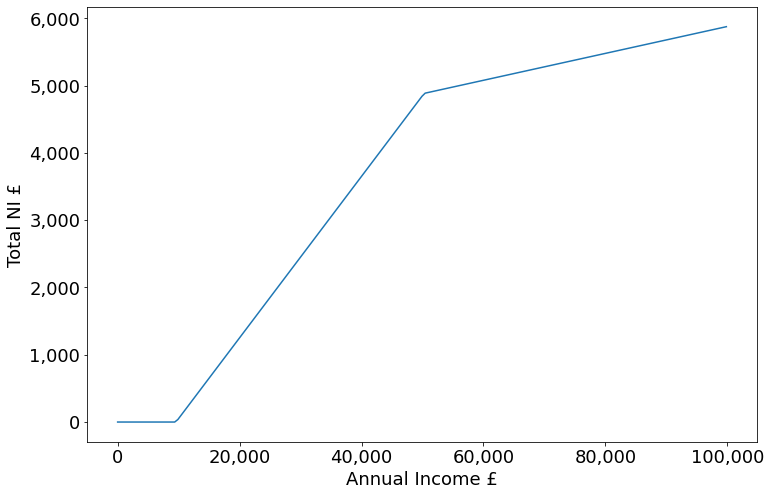

In [ ]:
do_plot(main_df[main_df['annual_income'] < 10000000], 'annual_ni', 'Total NI £')

In [124]:
main_df[main_df['annual_income'] < 2500000]

,weekly_income,annual_income,weekly_ni,annual_ni,effective_rate
0,0,0,0,0,NaN
1,10,520,0,0,0.000000
2,20,1040,0,0,0.000000
3,30,1560,0,0,0.000000
4,40,2080,0,0,0.000000
...,...,...,...,...,...
4803,48030,2497560,3555,184860,0.074016
4804,48040,2498080,3556,184912,0.074022
4805,48050,2498600,3558,185016,0.074048
4806,48060,2499120,3559,185068,0.074053
